# Data Massaging II
- Uso avanzado de pandas.
- Primeros análisis.
- Combinación de dataframes.
- Funciones lambda aplicadas a dataframes.
- Manejo de datos avanzado.

## Antes de empezar
- Revisar la configuración del ambiente de trabajo: Anaconda + VS Code.
- Obtener el archivo netflix_titles.csv del Centro de Descargas.

### Agregación de datos

In [2]:
# Importar un archivo CSV con Pandas

# Se importa la librería pandas
# La documentación de la librería se puede ver acá: https://pandas.pydata.org/docs/
import pandas as pd

# Otras librerías necesarias
import numpy as np
import os

# Cambiar el directorio actual con chdir
os.chdir('/users/memobarbosa/Análisis de datos/Parte 2/M17 - Data Massaging 2')

# Se usa la función read_csv para leer el archivo .csv
# Este archivo es el de películas de Netflix que hemos venido utilizando, y lo ingesta en la variable df
df = pd.read_csv('netflix_titles_2.csv')
df.sample(5)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
1517,1517,s1518,Movie,Ma Rainey's Black Bottom,George C. Wolfe,"Viola Davis, Chadwick Boseman, Glynn Turman, C...",United States,"December 18, 2020",2020,R,94 min,"Dramas, Music & Musicals",Tensions and temperatures rise at a Chicago mu...,94.0,min
3576,3576,s3577,TV Show,Apache: The Life of Carlos Tevez,NaN,"Balthazar Murillo, Vanesa González, Alberto Aj...",Argentina,"August 16, 2019",2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",This gritty dramatization of the life of Carlo...,1.0,season
6057,6057,s6058,Movie,A Serious Man,"Ethan Coen, Joel Coen","Michael Stuhlbarg, Richard Kind, Fred Melamed,...","United States, United Kingdom, France","January 16, 2018",2009,R,106 min,"Comedies, Independent Movies","With every aspect of his life unraveling, a Je...",106.0,min
8255,8255,s8256,Movie,The Consul's Son,Amr Arafa,"Khaled Saleh, Ghada Adel, Ahmed el-Sakka, Khal...",Egypt,"April 25, 2019",2011,TV-14,114 min,"Comedies, International Movies, Thrillers",A notorious forger known for his ability to cr...,114.0,min
3454,3454,s3455,TV Show,Rotten,NaN,NaN,United States,"October 4, 2019",2019,TV-MA,2 Seasons,"Docuseries, Science & Nature TV",This docuseries travels deep into the heart of...,2.0,season


In [3]:
# Funciones estadísticas básicas
# Utilizando los campos numéricos
# Para listar los campos se tiene la función describe()
df.describe()

,Unnamed: 0,release_year,duration_num
count,8807.000000,8807.000000,8807.000000
mean,4403.000000,2014.180198,69.848530
std,2542.506244,8.819312,50.806431
min,0.000000,1925.000000,1.000000
25%,2201.500000,2013.000000,2.000000
50%,4403.000000,2017.000000,88.000000
75%,6604.500000,2019.000000,106.000000
max,8806.000000,2021.000000,312.000000


In [4]:
# Se elimina la columna con .drop()
df.drop('Unnamed: 0', axis='columns', inplace=True)
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [5]:
# También se pueden obtener las estadísticas aisladas
print('Media =', df['duration_num'].mean())
print('Min =', df['duration_num'].min())
print('Max =', df['duration_num'].max())

Media = 69.84852957874418
Min = 1.0
Max = 312.0


In [6]:
# Agregación de datos, si es película (min) o serie (season), cuenta cuántos son
df.groupby('duration_unit').size()

duration_unit
min       6131
season    2676
dtype: int64

<Axes: xlabel='duration_unit'>

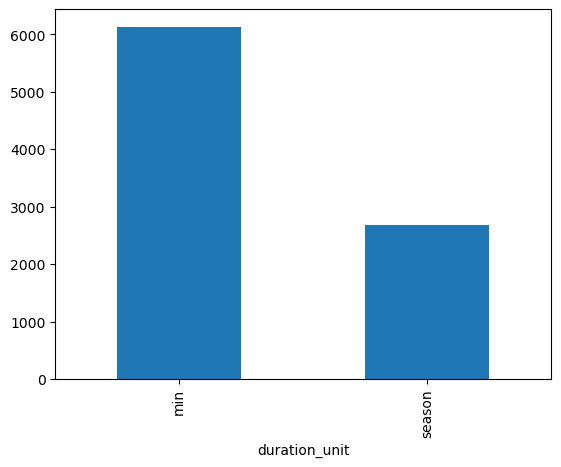

In [7]:
# Un gráfico simple de barras del número de películas y series
df.groupby('duration_unit').size().plot.bar()

### ¿Cómo calcular de horas tanto de películas como de series?

Las películas vienen en minutos, por lo que el número total simplemente se debería dividir para 60 minutos.

In [8]:
# También se puede hacer la suma
movies_minutes = df.loc[df['duration_unit'] == 'min', 'duration_num'].sum()

# Muestra las estadísticas, con 2 decimales
print(f'Total minutes for movies = {movies_minutes:.2f}')
print(f'Total hours for movies = {movies_minutes/60:.2f}')

Total minutes for movies = 610433.00
Total hours for movies = 10173.88


- Las series se tienen que calcular.
- Ahora se calcula la cantidad de seasons.
- Se asume que cada season tiene un promedio de 7 episodios.
- Y cada episodio dura 30 minutos.
- Así, si es que una serie tiene 1 season = 7 * 30 = 210 minutos.

In [9]:
# Largo en minutos
len_season_min = 7 * 30
# Largo en horas de una season
len_season_hr = len_season_min / 60
print(len_season_hr)

3.5


In [10]:
# Calcula el total de seasons del dataset
total_series = df.loc[df['duration_unit'] == 'season', 'duration_num'].sum()
print('Total de horas en seasons =', total_series)

# Ahora se multiplica el total de seasons por el largo de cada season
total_movies_hr = total_series * len_season_hr
print('Total de horas en series =', total_movies_hr)

Total de horas en seasons = 4723.0
Total de horas en series = 16530.5


In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,season
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,season


In [13]:
# Otra pregunta, las películas son más largas según su rating?
df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min')]

,title,country,release_year,duration_num,rating
0,Dick Johnson Is Dead,United States,2020,90.0,PG-13
6,My Little Pony: A New Generation,NaN,2021,91.0,PG
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125.0,TV-MA
9,The Starling,United States,2021,104.0,PG-13
12,Je Suis Karl,"Germany, Czech Republic",2021,127.0,TV-MA
...,...,...,...,...,...
8801,Zinzana,"United Arab Emirates, Jordan",2015,96.0,TV-MA
8802,Zodiac,United States,2007,158.0,R
8804,Zombieland,United States,2009,88.0,R
8805,Zoom,United States,2006,88.0,PG


/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


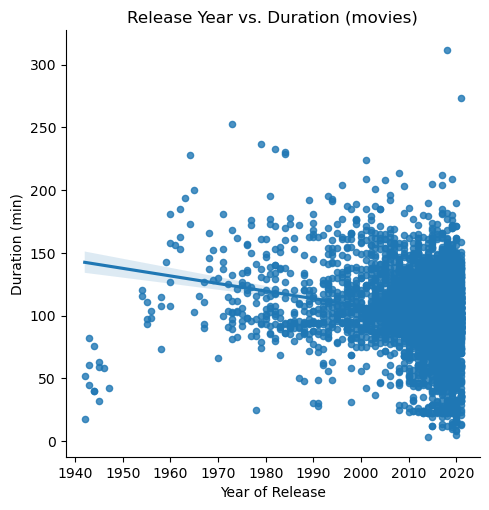

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min')]
sns.lmplot(x='release_year', y='duration_num', data=df_movies, fit_reg=True, scatter_kws={'marker': 'D', 's': 20})

plt.title('Release Year vs. Duration (movies)')
plt.xlabel('Year of Release')
plt.ylabel('Duration (min)')
plt.show()

/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


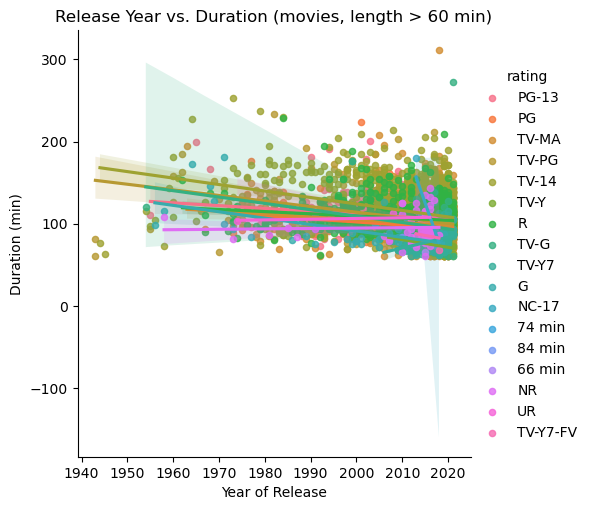

In [17]:
# Qué pasaría si es que se toman en cuenta nada más películas de por lo menos 60 minutos

df_movies2 = df[['title', 'country', 'release_year', 'duration_num', 'rating']].loc[(df['duration_unit'] == 'min') & (df['duration_num'] > 60)]
sns.lmplot(x='release_year', y='duration_num', data=df_movies2, fit_reg=True, scatter_kws={"marker": "S", "s": 20},
          hue='rating')

plt.title('Release Year vs. Duration (movies, length > 60 min)')
plt.xlabel('Year of Release')
plt.ylabel('Duration (min)')
plt.show()

In [18]:
# Agrupaciones simples
df.groupby('type').count()['show_id']

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [20]:
# Películas por país (top 10, ordenados)
df.groupby('country').count()['show_id'].sort_values(ascending=False)[:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: show_id, dtype: int64

<Axes: xlabel='country'>

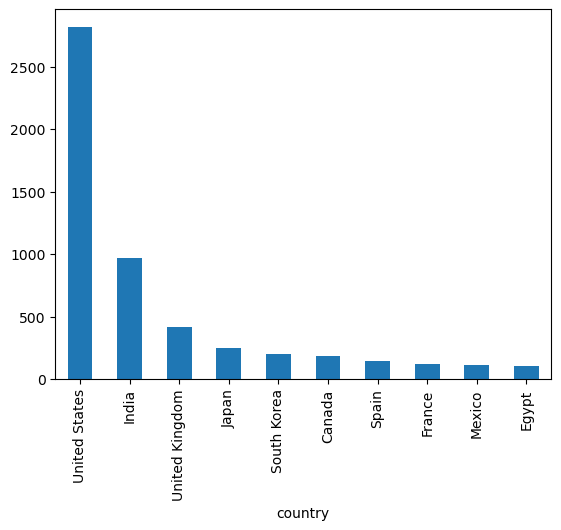

In [21]:
# Películas por país (top 10, ordenados), gráfico de barras
df.groupby('country').count()['show_id'].sort_values(ascending=False)[:10].plot.bar()

<Axes: ylabel='show_id'>

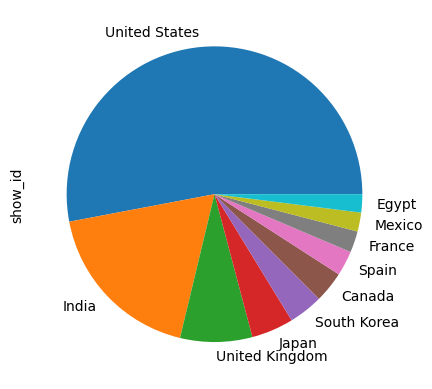

In [22]:
# Películas por país (top 10, ordenados), gráfico de pastel
df.groupby('country').count()['show_id'].sort_values(ascending=False)[:10].plot.pie()

In [23]:
# Películas por rating, top 5
df.groupby('rating').count()['show_id'].sort_values(ascending=False)[:5]

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: show_id, dtype: int64

<Axes: ylabel='show_id'>

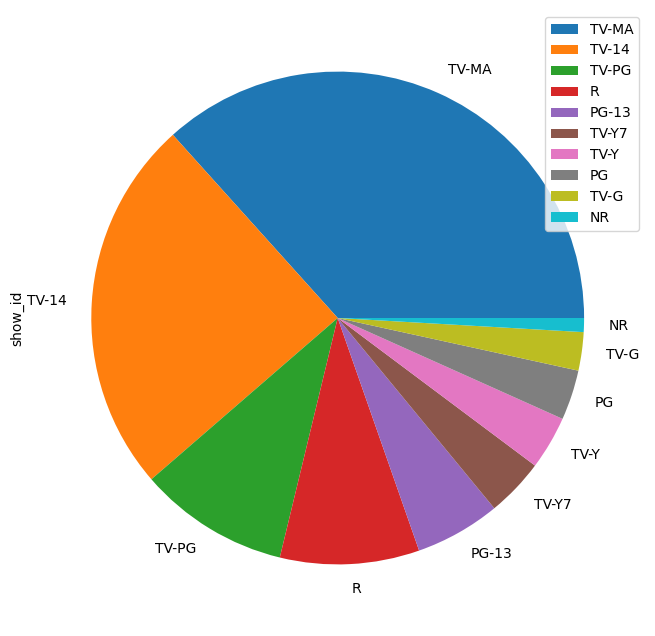

In [24]:
df.groupby('rating').count()['show_id'].sort_values(ascending=False)[:10].plot.pie(y='rating', figsize=(8,8), legend=True)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html